**Install tqdm and time Libraries**

In [29]:
!pip install tqdm
!pip install time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [30]:
from tqdm.notebook import tqdm_notebook
import time

**Import libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('sample_data/lingSpam.csv')
data

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1
...,...,...,...
2600,2600,Subject: computationally - intensive methods i...,0
2601,2601,Subject: books : a survey of american linguist...,0
2602,2602,Subject: wecol ' 98 - - western conference on ...,0
2603,2603,Subject: euralex ' 98 - revised programme\n \n...,0


**Data Preprocessing**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


In [6]:
data.describe()

,Unnamed: 0,Label
count,2605.000000,2605.000000
mean,1302.000000,0.166219
std,752.143049,0.372348
min,0.000000,0.000000
25%,651.000000,0.000000
50%,1302.000000,0.000000
75%,1953.000000,0.000000
max,2604.000000,1.000000


In [7]:
data.columns

Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')

**Convert Body column into lower case**

In [8]:
data['Body'] = data['Body'].str.lower()

In [9]:
data.head()

,Unnamed: 0,Body,Label
0,0,subject: great part-time or summer job !\n \n ...,1
1,1,subject: auto insurance rates too high ?\n \n ...,1
2,2,subject: do want the best and economical hunti...,1
3,3,subject: email 57 million people for $ 99\n \n...,1
4,4,subject: do n't miss these !\n \n attention ! ...,1


**Check null values**

In [10]:
data.isnull().sum()

Unnamed: 0    0
Body          0
Label         0
dtype: int64

In [11]:
data['Label'].unique()

array([1, 0])

In [12]:
y= data['Label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

**Append body column in list**

In [13]:
eml = []
for rev in tqdm_notebook(data['Body']):
    eml.append(rev)

  0%|          | 0/2605 [00:00<?, ?it/s]

In [25]:
eml

['subject: great part-time or summer job !\n \n * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-

In [14]:
len(eml)

2605

**Regular Expression**

In [15]:
import re

In [22]:
e = []
for i in tqdm_notebook(range(len(eml))):
    tex = eml[i]
    pattern ='[\w]+.@.[\w]+...[[\w]+|@.[\w_]+|<[\W]+>|\\[n]|[\w]+:|\n|_|=|-|!|>|<|#|http\D{7}[\w]+\D{3}[\w]+\D{3}[\w]+\D{3}|http\D{7}www\D{3}[\w]+\D{3}[\w]+\D{3}[\w]+\D{3}[\w]+'
    #pattern = '[]+|\t|'
    cleantext = re.sub(pattern,'',tex)
    e.append(cleantext)

  0%|          | 0/2605 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Possible nested set at position 17
  


In [23]:
len(e)

2605

**Import Nltk And Doenload Punkt**

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Sentence Tokenization**

In [31]:
sentences = []
for i in tqdm_notebook(range(len(e))):
    t= e[i]
    sentences.append(nltk.sent_tokenize(t))

  0%|          | 0/2605 [00:00<?, ?it/s]

In [32]:
len(sentences)

2605

**Import Word tokenize, Lammitization And Stop words**

In [33]:
from nltk import word_tokenize

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
from nltk.corpus import stopwords

In [36]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [37]:
lim = WordNetLemmatizer()

In [38]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [40]:
processed = []
for i in tqdm_notebook(range(len(data.Body))):
    tokens = word_tokenize(e[i])
    words = []
    for word in tokens:
        if word not in stop_words:
            words.append(word)
    lemmas = []
    for lemma in words:
        norm = lim.lemmatize(lemma)
        lemmas.append(norm)
    
    lemmas = ' '.join(lemmas)
    processed.append(lemmas)

  0%|          | 0/2605 [00:00<?, ?it/s]

In [41]:
len(processed)

2605

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(processed)
feature_names = vectorizer.get_feature_names()
feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '00001',
 '0000300014046',
 '0000300395880',
 '0000536088',
 '0000725',
 '0001',
 '000100',
 '00014',
 '000265',
 '0003',
 '00065',
 '00080',
 '00085',
 '0009',
 '000bp',
 '000s',
 '000yen',
 '001',
 '0010',
 '0011',
 '0012',
 '0013',
 '00133',
 '0014',
 '0015',
 '0016',
 '0017',
 '0018',
 '0019',
 '00198',
 '002',
 '0020',
 '0021',
 '002656',
 '0027',
 '003',
 '0030',
 '0033387902188',
 '00393193',
 '004161',
 '0044',
 '0049',
 '004940',
 '0049521',
 '005',
 '006',
 '007',
 '00710',
 '00799',
 '008',
 '009',
 '00919680',
 '00a',
 '00am',
 '00arrival',
 '00b',
 '00coffee',
 '00congress',
 '00d',
 '00dinner',
 '00h',
 '00j',
 '00l',
 '00m',
 '00p',
 '00pm',
 '00r',
 '00t',
 '00tea',
 '00the',
 '00uzheb',
 '01',
 '010',
 '0100',
 '01003',
 '0101',
 '01040306',
 '01075',
 '0108',
 '011',
 '0111',
 '01149',
 '01152',
 '011678',
 '0117',
 '0118',
 '01182',
 '01222',
 '01225',
 '01232366243',
 '01235',
 '01237',
 '01273',
 '013',
 '0131',
 '013114332',
 '01334',
 '01

**Splitting Data**

In [44]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(bag_of_words, y, shuffle = True, random_state = 152) 

**Logistic Regression**

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [59]:
log_acc = accuracy_score(ytest, prediction)
print(f'The accuracy of naive bayes is {log_acc}')

The accuracy of naive bayes is 0.9877300613496932


In [61]:
cm = confusion_matrix(ytest, prediction)
print(cm)

[[551   2]
 [  6  93]]


**TF IDF Vectorization**

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(min_df = 25)

X_tfidf = tfidf_vector.fit_transform(processed)


tfidf_feature_name = tfidf_vector.get_feature_names()
tfidf_feature_name = np.array(tfidf_feature_name)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
tfidf = pd.DataFrame(X_tfidf.toarray(), columns  = tfidf_feature_name)
tfidf.head()

,00,000,05,08,09,10,100,1000,10532,10th,...,year,yes,yet,yield,yorick,york,young,zero,zip,zur
0,0.122308,0.000000,0.0,0.0,0.0,0.112882,0.000000,0.0,0.0,0.0,...,0.060328,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.077386,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.085167,0.266238,0.0,0.0,0.0,0.019651,0.111136,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.034978,0.0
4,0.015330,0.000000,0.0,0.0,0.0,0.042445,0.000000,0.0,0.0,0.0,...,0.060491,0.0,0.021611,0.0,0.0,0.019951,0.0,0.0,0.025184,0.0


**Plot**

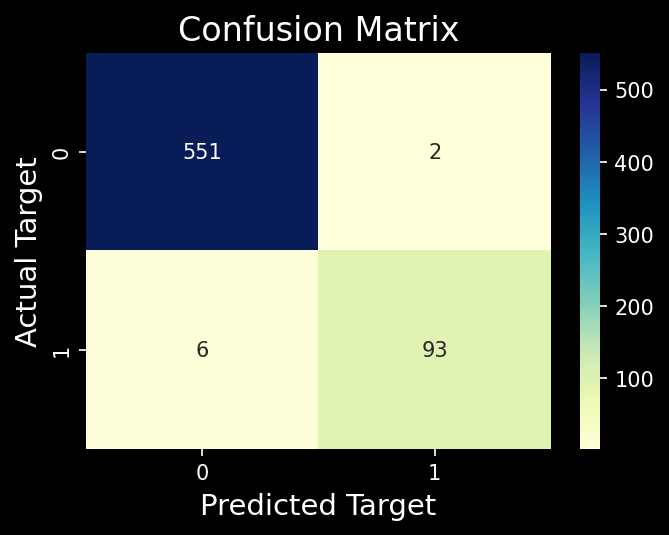

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
naive_cm = confusion_matrix(ytest, prediction)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')

**Naive Bayes**

In [45]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(xtrain, ytrain)

bayes_pred = bayes.predict(xtest)
bayes_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

**Accurcy Score And Confusion Matrix**

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
bayes_acc = accuracy_score(ytest, bayes_pred)
print(f'The accuracy of naive bayes is {bayes_acc}')

The accuracy of naive bayes is 0.9923312883435583


In [48]:
cm = confusion_matrix(ytest, bayes_pred)
print(cm)

[[550   3]
 [  2  97]]


**Tf idf Vectorization**

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(min_df = 25)

X_tfidf = tfidf_vector.fit_transform(processed)


tfidf_feature_name = tfidf_vector.get_feature_names()
tfidf_feature_name = np.array(tfidf_feature_name)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
tfidf = pd.DataFrame(X_tfidf.toarray(), columns  = tfidf_feature_name)
tfidf.head()

,00,000,05,08,09,10,100,1000,10532,10th,...,year,yes,yet,yield,yorick,york,young,zero,zip,zur
0,0.122308,0.000000,0.0,0.0,0.0,0.112882,0.000000,0.0,0.0,0.0,...,0.060328,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.077386,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.085167,0.266238,0.0,0.0,0.0,0.019651,0.111136,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.034978,0.0
4,0.015330,0.000000,0.0,0.0,0.0,0.042445,0.000000,0.0,0.0,0.0,...,0.060491,0.0,0.021611,0.0,0.0,0.019951,0.0,0.0,0.025184,0.0


**Plot**

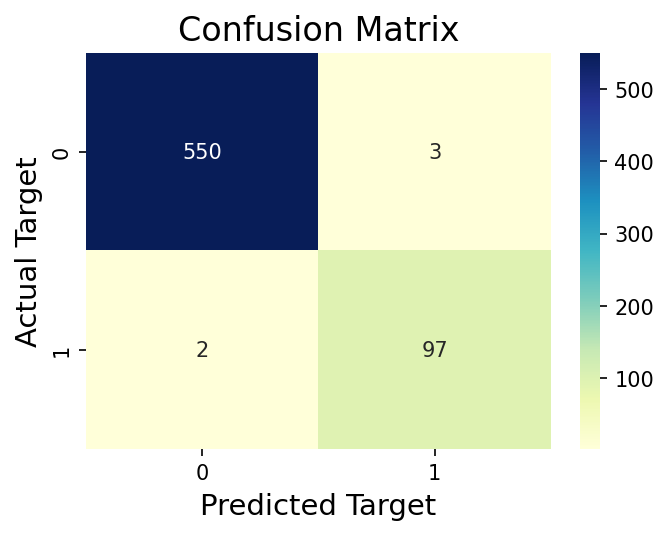

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
naive_cm = confusion_matrix(ytest, bayes_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')